# Lung Cancer Prediction Using Machine Learning

### Data Analytics Project for IA2

#### Group Members:
- Rikhav Satra
- Siddhi Somaiya
- Amaan Syed
- Keshav Pandya

---

### Project Overview:
This project applies machine learning techniques to predict lung cancer risk levels (Low, Medium, High) based on patient data. Using various supervised learning algorithms such as **Support Vector Machine (SVM)**, **Decision Tree**, and **Random Forest**, we aim to classify lung cancer cases with high accuracy.

### Key Objectives:
1. Explore and preprocess the dataset.
2. Implement machine learning algorithms for classification.
3. Compare model performances using accuracy, precision, recall, and F1-score.
4. Visualize results using confusion matrices and accuracy plots.

---

### Dataset Description:
The dataset used in this project contains 1,000 records and 24 features related to patient characteristics, such as **age**, **smoking habits**, **air pollution exposure**, and more. The target variable is the **lung cancer risk level**.

---

### Machine Learning Models Used:
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**
---


### Import the dataset
First, we will import the dataset, and explore it's attributes

In [28]:
import pandas as pd
df= pd.read_csv('lung_cancer_dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

### Data preprocessing

- Drop the `Patient_Id` column


In [29]:
df= df.drop(['Patient Id'], axis=1)

- Encode the target variable `Level` 


In [30]:
df['Level']= df['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

- Check for any missing values

In [31]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

No null values found.

After the prepocessing, here is what the dataset loks like:

In [32]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


### Train-Test split
Split the dataset into features(x) and target (y), and then into training and testing sets. We're diving the dataset into 80:20 ratio for training and testing respectively.

In [33]:
from sklearn.model_selection import train_test_split

X= df.drop(['Level'], axis=1)
y= df['Level']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

### Model Implementation
As per our reference to the research paper, we're going to implement 3 models, namely **SVM**, **Decision Tree**, and **Random Forest**.


- **Support Vector Machine**


In [34]:
from sklearn.svm import SVC

svm= SVC()
svm.fit(X_train, y_train)
svm_predictions= svm.predict(X_test)

- **Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions= dt.predict(X_test)

- **Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(X_train, y_train)

rf_predictions= rf.predict(X_test)

### Model Performance Evaluation
We're going to be evaluating our models on 3 metrics: **precision**, **recall** and **F1 Score**

First, we're going to generate confusion matrices for each model to visualize the outputs 

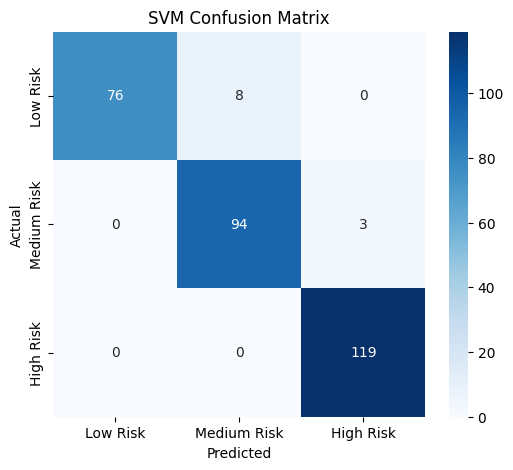

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Low Risk', 'Medium Risk', 'High Risk']

svm_cm = confusion_matrix(y_test, svm_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


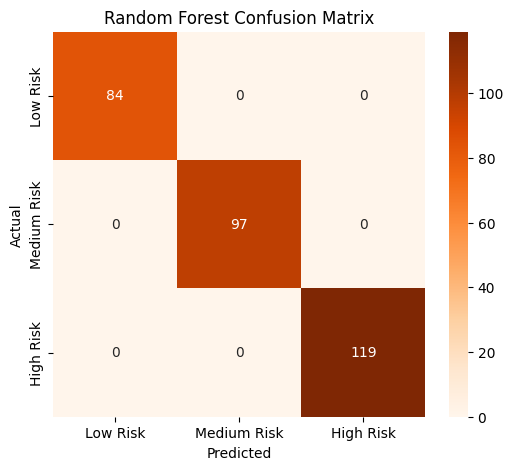

In [49]:
rf_cm= confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

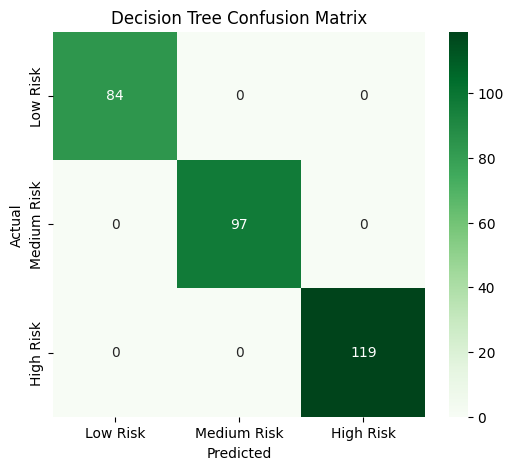

In [50]:
dt_cm= confusion_matrix(y_test, dt_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We can extract the precision, recall and f1 scores using `classification_report` provided by sklearn

In [51]:
from sklearn.metrics import classification_report

svm_report= classification_report(y_test, svm_predictions, output_dict=True)
rf_report= classification_report(y_test, rf_predictions, output_dict=True)
dt_report= classification_report(y_test, dt_predictions, output_dict=True)

Convert it to Dataframes for easy plotting

In [54]:
svm_df = pd.DataFrame(svm_report).transpose()
dt_df = pd.DataFrame(dt_report).transpose()
rf_df = pd.DataFrame(rf_report).transpose()


Plot the values

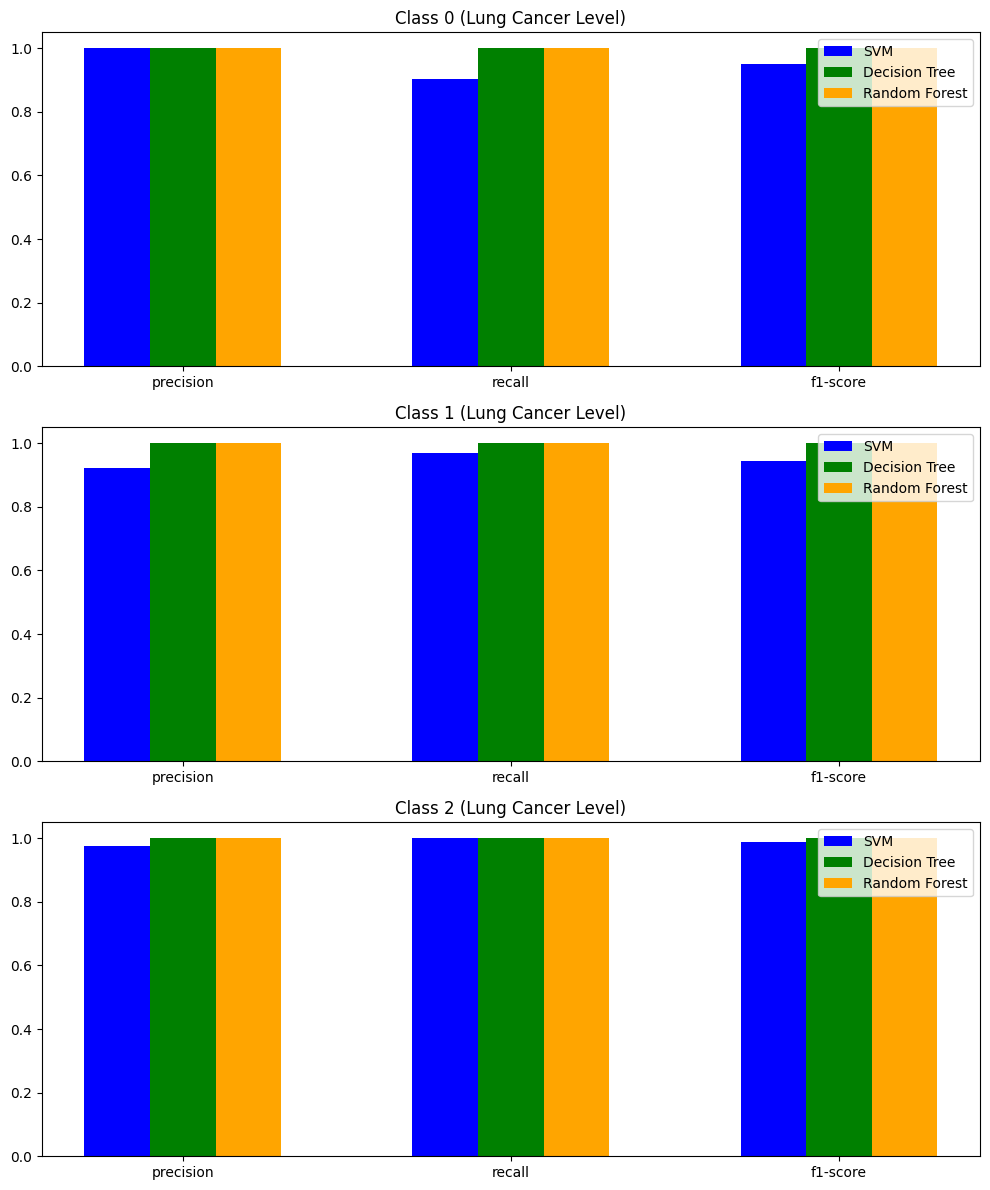

In [56]:
import numpy as np

metrics = ['precision', 'recall', 'f1-score']
categories = ['0', '1', '2']  

svm_values = [svm_df.loc[category, metrics] for category in categories]
dt_values = [dt_df.loc[category, metrics] for category in categories]
rf_values = [rf_df.loc[category, metrics] for category in categories]

x = np.arange(len(metrics))  
width = 0.2 

fig, ax = plt.subplots(3, figsize=(10, 12))

for i, category in enumerate(categories):
    ax[i].bar(x - width, svm_values[i], width, label='SVM', color='blue')
    ax[i].bar(x, dt_values[i], width, label='Decision Tree', color='green')
    ax[i].bar(x + width, rf_values[i], width, label='Random Forest', color='orange')
    
    ax[i].set_title(f'Class {category} (Lung Cancer Level)')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(metrics)
    ax[i].legend()

plt.tight_layout()
plt.show()


Finally, Plot the accuracy scores

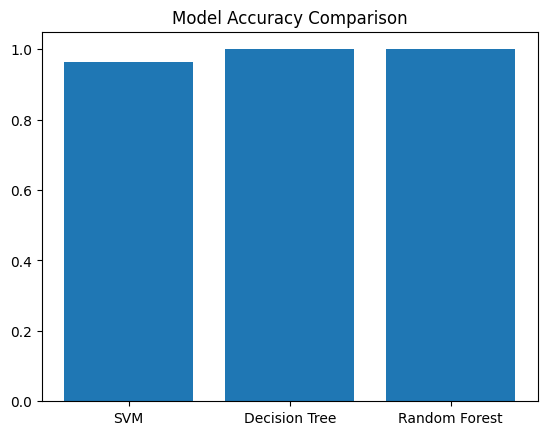

In [58]:
from sklearn.metrics import accuracy_score


models = ['SVM', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, svm_predictions), accuracy_score(y_test, dt_predictions), accuracy_score(y_test, rf_predictions)]
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.show()

# Summary
### Results:
- **SVM**: 96.33%
- **Decision Tree**: 100%
- **Random Forest**: 100%
---
### Conclusion:
The **Decision Tree** and **Random Forest** models achieved the highest accuracy at 100%, while the **Support Vector Machine** model achieved an accuracy of 96.33%.

---
### References:
-  Research Paper: [Prediction Lung Cancer Based Critical Factors Using Machine Learning](https://www.researchgate.net/publication/374381720)
-  Dataset: [Data World - Lung Cancer](https://data.world/cancerdatahp/lung-cancer-data)
